In [ ]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from plotly.subplots import make_subplots
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.spatial.distance import cdist, pdist
import plotly.express as px
import plotly.graph_objects as go
from itertools import product
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# import the dataset
data=pd.read_csv("/content/data_feature.csv", header =None , skiprows=0)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,2,0,0,0,0,1,1,5,0,1,...,0,0,0,0,1,0,0,1,1,0
1,1,1,1,0,1,0,1,0,0,4,...,1,1,0,0,0,1,0,0,0,0
2,0,0,1,4,0,1,0,4,3,1,...,1,1,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,1,...,0,0,2,0,0,4,0,0,0,1
4,1,1,0,0,1,0,1,0,0,2,...,2,1,0,0,3,0,1,1,0,1


In [ ]:
# information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Columns: 500 entries, 0 to 499
dtypes: int64(500)
memory usage: 703.2 KB


In [ ]:
data.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Length: 500, dtype: int64

In [ ]:
# Reducing the dimensions of the data for visualization
pca_n = PCA(n_components = 2)
X_principal = pca_n.fit_transform(data)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']
X_principal.head()

NameError: ignored

In [ ]:
#plot data after pca
fig = go.Figure(go.Scatter(
    x=X_principal['P1'], y=X_principal['P2'], mode='markers'))
fig.update_xaxes(title_text='P2')
fig.update_yaxes(title_text='P1')
fig.update_layout(height=500, width=500,
                  title_text='Principal Component Analysis')

NameError: ignored

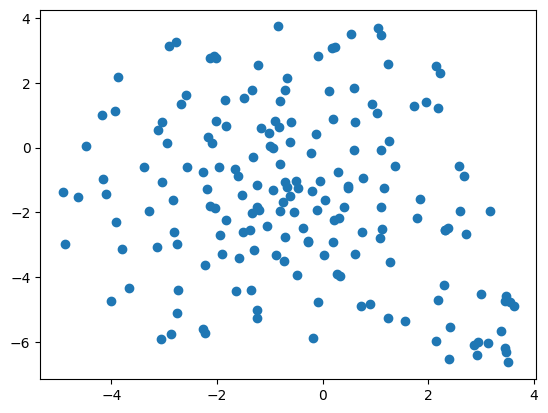

In [ ]:
# apply t-SNE with two components
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(data)
tsne_df = pd.DataFrame(X_tsne, columns=['tsne_1', 'tsne_2'])
# plot the results
plt.scatter(tsne_df['tsne_1'], tsne_df['tsne_2'])
plt.show()

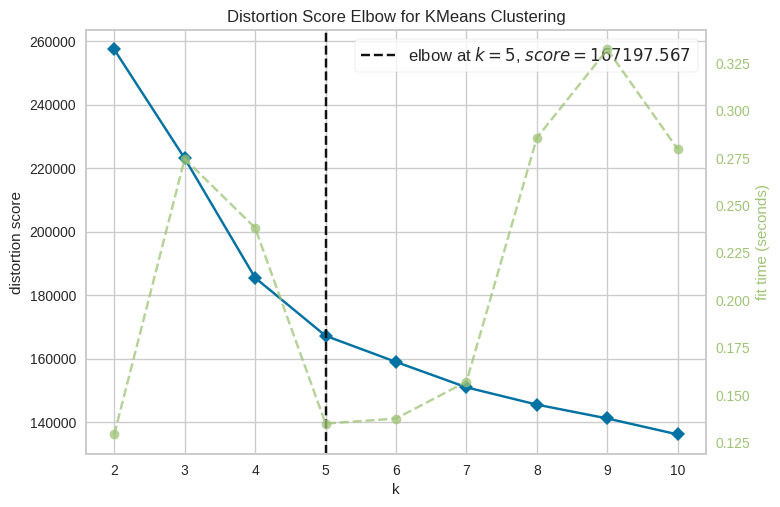

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
# Quick examination of elbow method to find numbers of clusters
Elb = KElbowVisualizer(KMeans(), k=10)
Elb.fit(data)
Elb.show()

In [ ]:
# Import NMF
from sklearn.decomposition import NMF

# Create an NMF instance: model
model = NMF(n_components=100)

# Fit the model to televote_Rank
model.fit(data)

# Transform the televote_Rank: nmf_features
nmf_features = model.transform(data)

In [ ]:
def nmf_kmeans(n, k, data):
  # Create an NMF instance: model
  model = NMF(n_components=n)

  # Fit the model to televote_Rank
  model.fit(data)

  # Transform the televote_Rank: nmf_features
  nmf_features = model.transform(data)

  # Apply K-means clustering
  my_kmeans = KMeans(n_clusters=k, random_state=0).fit(nmf_features)
  return my_kmeans


In [ ]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=0).fit(data)
nmf_kmeans_10 = nmf_kmeans(10, k, data)
nmf_kmeans_20 = nmf_kmeans(20, k, data)
nmf_kmeans_30 = nmf_kmeans(30, k, data)
nmf_kmeans_40 = nmf_kmeans(40, k, data)
nmf_kmeans_50 = nmf_kmeans(50, k, data)
nmf_kmeans_60 = nmf_kmeans(60, k, data)
nmf_kmeans_70 = nmf_kmeans(70, k, data)
nmf_kmeans_80 = nmf_kmeans(80, k, data)
nmf_kmeans_90 = nmf_kmeans(90, k, data)
nmf_kmeans_100 = nmf_kmeans(100, k, data)



In [ ]:
nmf_kmeans_2 = nmf_kmeans(2, k, data)

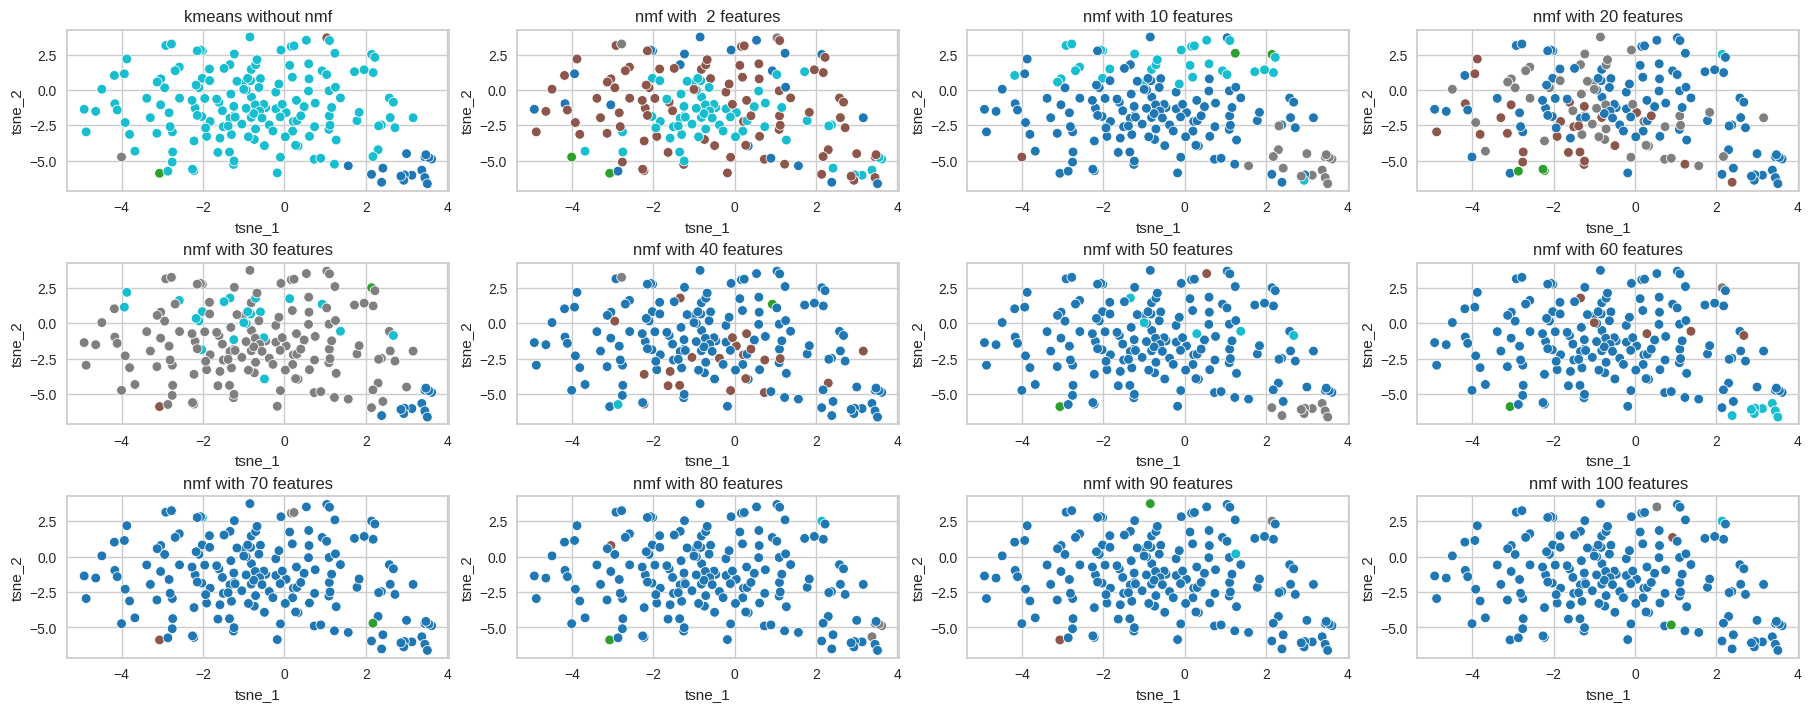

In [ ]:
kmeans_graph = {  'kmeans without nmf'  : kmeans,
                  'nmf with  2 features': nmf_kmeans_2,
                  'nmf with 10 features': nmf_kmeans_10,
                  'nmf with 20 features': nmf_kmeans_20,
                  'nmf with 30 features': nmf_kmeans_30,
                  'nmf with 40 features': nmf_kmeans_40,
                  'nmf with 50 features': nmf_kmeans_50,
                  'nmf with 60 features': nmf_kmeans_60,
                  'nmf with 70 features': nmf_kmeans_70,
                  'nmf with 80 features': nmf_kmeans_80,
                  'nmf with 90 features': nmf_kmeans_90,
                  'nmf with 100 features': nmf_kmeans_100}

plt.figure(figsize=(18, 7), constrained_layout=True)
for i, j in zip(kmeans_graph, range(1,13)):
    plt.subplot(3,4,j)
    sns.scatterplot(x='tsne_1', y='tsne_2', data=tsne_df,
                    c= kmeans_graph[i].labels_,
                    cmap='tab10')

    plt.title(i)

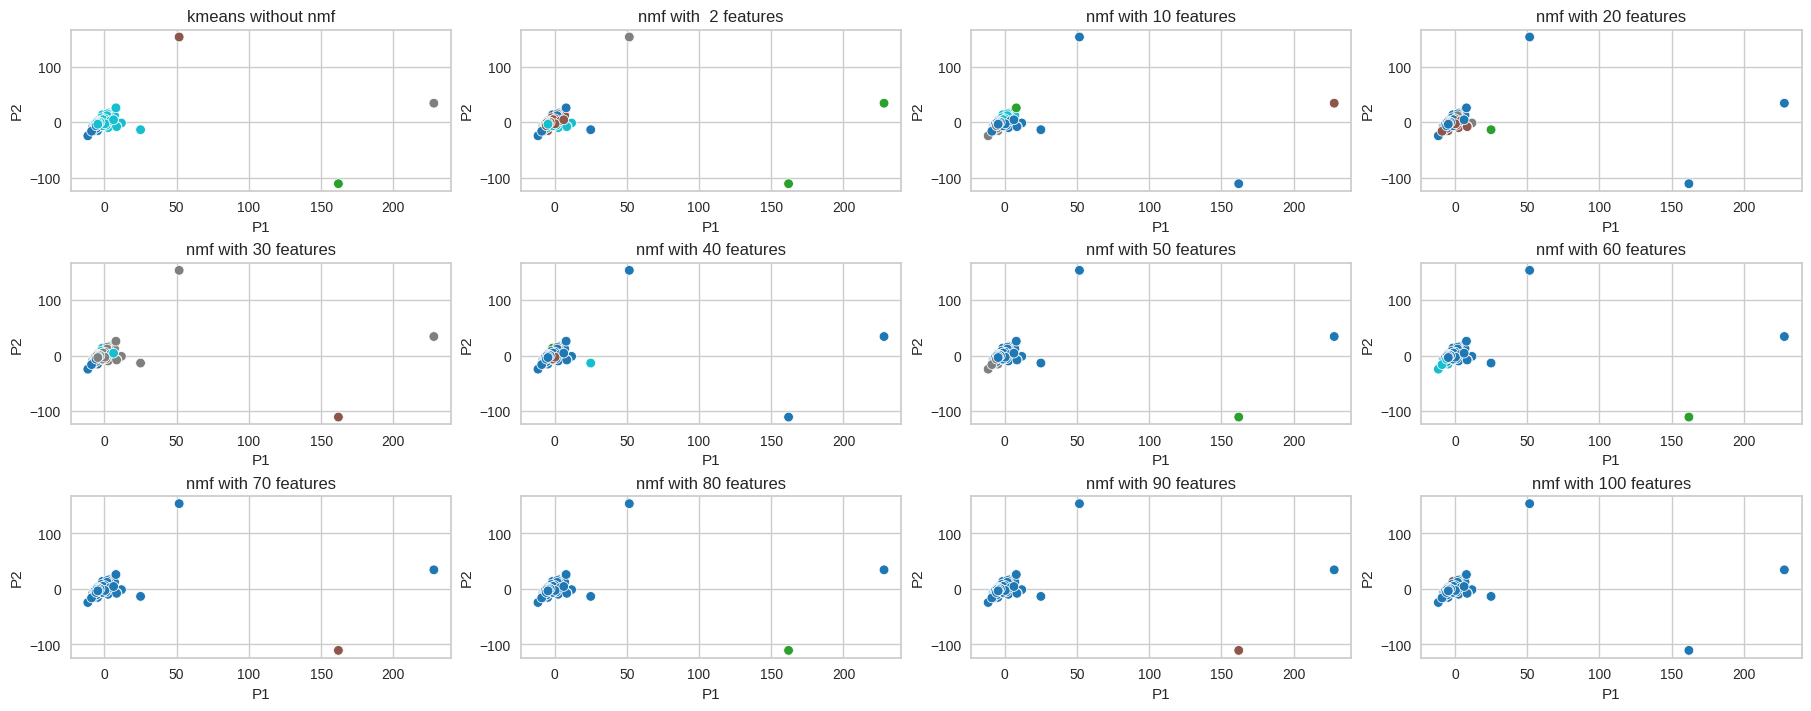

In [ ]:
kmeans_graph = {  'kmeans without nmf'  : kmeans,
                  'nmf with  2 features': nmf_kmeans_2,
                  'nmf with 10 features': nmf_kmeans_10,
                  'nmf with 20 features': nmf_kmeans_20,
                  'nmf with 30 features': nmf_kmeans_30,
                  'nmf with 40 features': nmf_kmeans_40,
                  'nmf with 50 features': nmf_kmeans_50,
                  'nmf with 60 features': nmf_kmeans_60,
                  'nmf with 70 features': nmf_kmeans_70,
                  'nmf with 80 features': nmf_kmeans_80,
                  'nmf with 90 features': nmf_kmeans_90,
                  'nmf with 100 features': nmf_kmeans_100}

f = plt.figure(figsize=(18, 7), constrained_layout=True)
for i, j in zip(kmeans_graph, range(1,13)):
    plt.subplot(3,4,j)
    sns.scatterplot(x='P1', y='P2', data=X_principal,
                    c= kmeans_graph[i].labels_,
                    cmap='tab10')
    plt.title(i)

In [ ]:
number_of_features = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
# Create Accumulator for matric
s_scores = []
db_scores = []
calinski_scores = []

kmeans = KMeans(n_clusters=5, random_state=0).fit(data)
s_scores.append(silhouette_score(data, kmeans.labels_))
db_scores.append(davies_bouldin_score(data, kmeans.labels_))
calinski_scores.append(calinski_harabasz_score(data, kmeans.labels_))


#looping for modeling
for i in number_of_features:
    kmeans = nmf_kmeans(i, 5, data)
    s_scores.append(silhouette_score(data, kmeans.labels_))
    db_scores.append(davies_bouldin_score(data, kmeans.labels_))
    calinski_scores.append(calinski_harabasz_score(data, kmeans.labels_))

In [ ]:
#creating plot for scoring visualization
fig = make_subplots(rows=3, cols=1, shared_xaxes=True, vertical_spacing=.01)
kmeans_scores = {'Silhouette': s_scores,
                'Davies Bouldin': db_scores,
                'Calinski-Harabasz': calinski_scores}

for i, score in zip(np.arange(1, 4), kmeans_scores):
    fig.append_trace(go.Scatter(
        x=list([0]+number_of_features), y=kmeans_scores[score], name=score), row=i, col=1)
    fig.update_yaxes(title_text=score, row=i, col=1)

fig.update_xaxes(title_text='Number of Clusters', row=3)
fig.update_layout(height=800, width=900,
                  showlegend=False,
                  title_text='Metric Scores')

In [ ]:
X_principal_without_outlier = X_principal[~(X_principal.P1>50)].copy()

In [ ]:
tsne_without_outlier = tsne_df[~(X_principal.P1>50)].copy()

In [ ]:
#plot data after pca
fig = go.Figure(go.Scatter(
    x=X_principal_without_outlier['P1'], y=X_principal_without_outlier['P2'], mode='markers'))
fig.update_xaxes(title_text='P2')
fig.update_yaxes(title_text='P1')
fig.update_layout(height=500, width=500,
                  title_text='Principal Component Analysis')

In [ ]:
fig = go.Figure(go.Scatter(
    x=tsne_without_outlier['tsne_1'], y=tsne_without_outlier['tsne_2'], mode='markers'))
fig.update_xaxes(title_text='tsne_2')
fig.update_yaxes(title_text='tsne_1')
fig.update_layout(height=500, width=500,
                  title_text='TSNE')

In [ ]:
data_without_outlier = data[~(X_principal.P1>50)].copy()

In [ ]:
data_without_outlier

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,2,0,0,0,0,1,1,5,0,1,...,0,0,0,0,1,0,0,1,1,0
1,1,1,1,0,1,0,1,0,0,4,...,1,1,0,0,0,1,0,0,0,0
2,0,0,1,4,0,1,0,4,3,1,...,1,1,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,1,...,0,0,2,0,0,4,0,0,0,1
4,1,1,0,0,1,0,1,0,0,2,...,2,1,0,0,3,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0,1,0,1,1,0,0,0,0,1,...,2,0,0,3,5,2,1,1,0,0
176,2,0,0,1,1,4,2,2,1,2,...,2,1,1,0,1,0,0,1,0,0
177,0,1,2,0,0,0,0,1,0,2,...,2,1,0,0,0,1,1,1,1,1
178,1,0,2,1,1,2,1,4,0,0,...,0,0,0,0,4,2,0,0,1,2


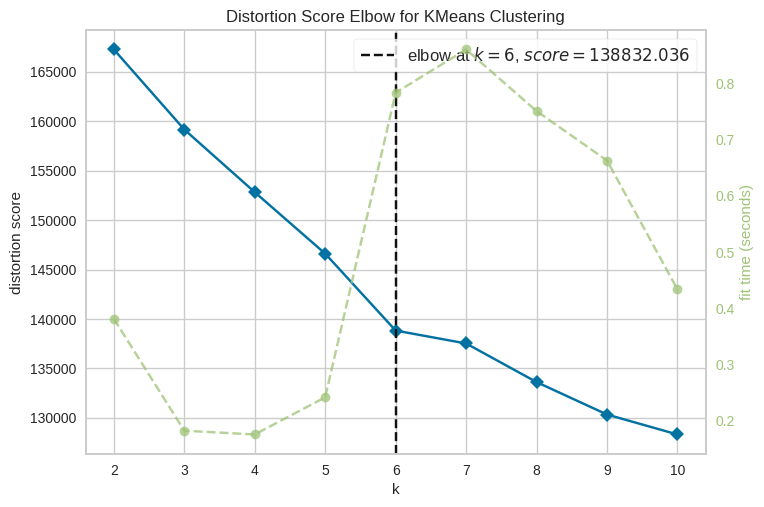

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Quick examination of elbow method to find numbers of clusters
Elb = KElbowVisualizer(KMeans(), k=10)
Elb.fit(data_without_outlier)
Elb.show()

In [ ]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=0).fit(data_without_outlier)
nmf_kmeans_10 = nmf_kmeans(10, k, data_without_outlier)
nmf_kmeans_20 = nmf_kmeans(20, k, data_without_outlier)
nmf_kmeans_30 = nmf_kmeans(30, k, data_without_outlier)
nmf_kmeans_40 = nmf_kmeans(40, k, data_without_outlier)
nmf_kmeans_50 = nmf_kmeans(50, k, data_without_outlier)
nmf_kmeans_60 = nmf_kmeans(60, k, data_without_outlier)
nmf_kmeans_70 = nmf_kmeans(70, k, data_without_outlier)
nmf_kmeans_80 = nmf_kmeans(80, k, data_without_outlier)
nmf_kmeans_90 = nmf_kmeans(90, k, data_without_outlier)
nmf_kmeans_100 = nmf_kmeans(100, k, data_without_outlier)


In [ ]:
nmf_kmeans_2 = nmf_kmeans(2, k, data_without_outlier)

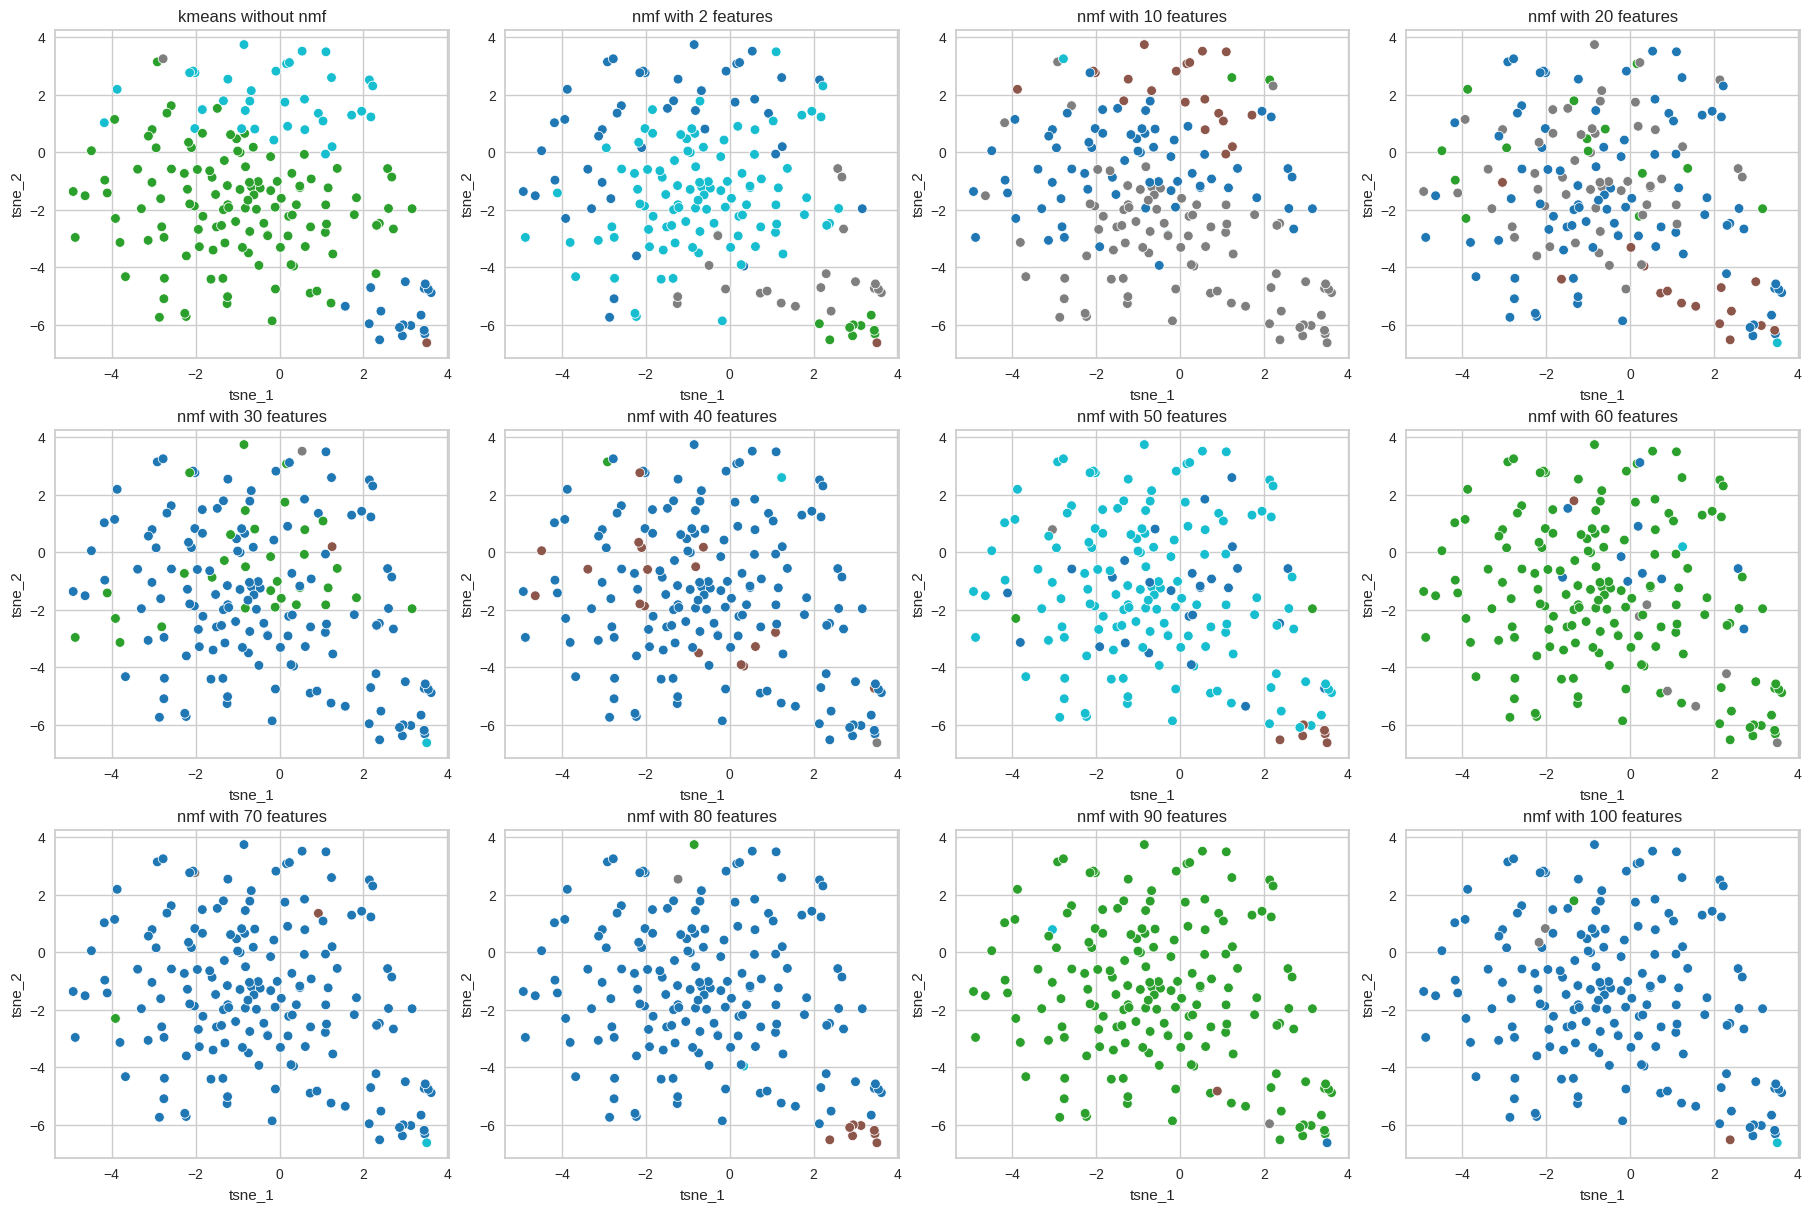

In [ ]:
kmeans_graph = {  'kmeans without nmf'  : kmeans,
                  'nmf with 2 features' : nmf_kmeans_2,
                  'nmf with 10 features': nmf_kmeans_10,
                  'nmf with 20 features': nmf_kmeans_20,
                  'nmf with 30 features': nmf_kmeans_30,
                  'nmf with 40 features': nmf_kmeans_40,
                  'nmf with 50 features': nmf_kmeans_50,
                  'nmf with 60 features': nmf_kmeans_60,
                  'nmf with 70 features': nmf_kmeans_70,
                  'nmf with 80 features': nmf_kmeans_80,
                  'nmf with 90 features': nmf_kmeans_90,
                  'nmf with 100 features': nmf_kmeans_100}

plt.figure(figsize=(18, 12), constrained_layout=True)
for i, j in zip(kmeans_graph, range(1,13)):
    plt.subplot(3,4,j)
    sns.scatterplot(x='tsne_1', y='tsne_2', data=tsne_without_outlier,
                    c= kmeans_graph[i].labels_,
                    cmap='tab10')

    plt.title(i)

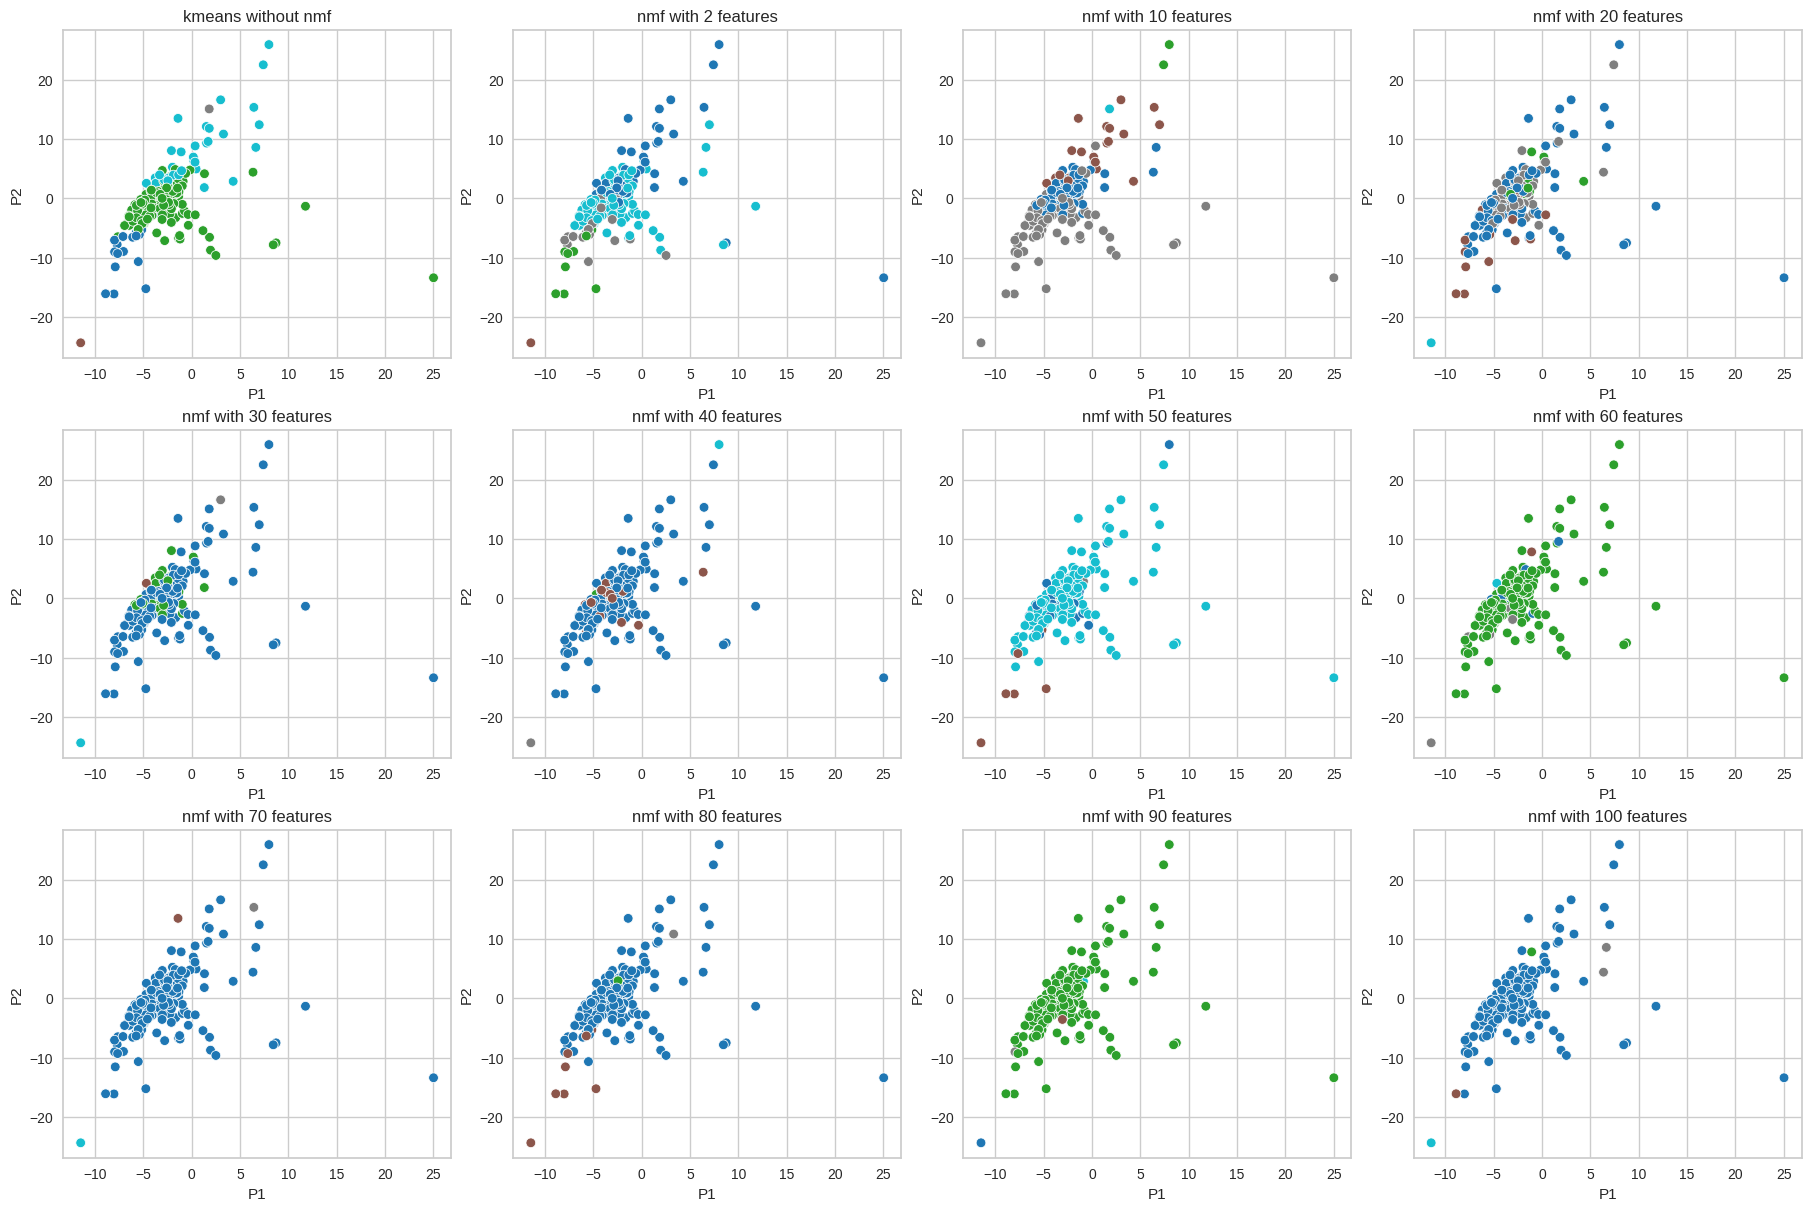

In [ ]:
kmeans_graph = {  'kmeans without nmf'  : kmeans,
                  'nmf with 2 features' : nmf_kmeans_2,
                  'nmf with 10 features': nmf_kmeans_10,
                  'nmf with 20 features': nmf_kmeans_20,
                  'nmf with 30 features': nmf_kmeans_30,
                  'nmf with 40 features': nmf_kmeans_40,
                  'nmf with 50 features': nmf_kmeans_50,
                  'nmf with 60 features': nmf_kmeans_60,
                  'nmf with 70 features': nmf_kmeans_70,
                  'nmf with 80 features': nmf_kmeans_80,
                  'nmf with 90 features': nmf_kmeans_90,
                  'nmf with 100 features': nmf_kmeans_100}

plt.figure(figsize=(18, 12), constrained_layout=True)
for i, j in zip(kmeans_graph, range(1,13)):
    plt.subplot(3,4,j)
    sns.scatterplot(x='P1', y='P2', data=X_principal_without_outlier,
                    c= kmeans_graph[i].labels_,
                    cmap='tab10')

    plt.title(i)

In [ ]:
number_of_features = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
# Create Accumulator for matric
s_scores = []
db_scores = []
calinski_scores = []

kmeans = KMeans(n_clusters=5, random_state=0).fit(data_without_outlier)
s_scores.append(silhouette_score(data_without_outlier, kmeans.labels_))
db_scores.append(davies_bouldin_score(data_without_outlier, kmeans.labels_))
calinski_scores.append(calinski_harabasz_score(data_without_outlier, kmeans.labels_))


#looping for modeling
for i in number_of_features:
    kmeans = nmf_kmeans(i, 5, data_without_outlier)
    s_scores.append(silhouette_score(data_without_outlier, kmeans.labels_))
    db_scores.append(davies_bouldin_score(data_without_outlier, kmeans.labels_))
    calinski_scores.append(calinski_harabasz_score(data_without_outlier, kmeans.labels_))

In [ ]:
#creating plot for scoring visualization
fig = make_subplots(rows=3, cols=1, shared_xaxes=True, vertical_spacing=.01)
kmeans_scores = {'Silhouette': s_scores,
                'Davies Bouldin': db_scores,
                'Calinski-Harabasz': calinski_scores}

for i, score in zip(np.arange(1, 4), kmeans_scores):
    fig.append_trace(go.Scatter(
        x=list([0]+number_of_features), y=kmeans_scores[score], name=score), row=i, col=1)
    fig.update_yaxes(title_text=score, row=i, col=1)

fig.update_xaxes(title_text='Number of Clusters', row=3)
fig.update_layout(height=800, width=900,
                  showlegend=False,
                  title_text='Metric Scores')